In [1]:
import pandas as pd
import re
import os
import matplotlib as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('RED.csv')
df.tail()

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
2093,"House For Rent In Chapali, Kathmandu","Bhangal, Chapali, Kathmandu",Kathmandu,500000.0,5,5,3.0,5,North East,NaN,3.1K,5476.000,16 Feet,16 Feet,NaN,N/A Sq. Feet,1 year ago,"['Balcony', 'Frontyard', 'Garden', 'Drainage',..."
2094,"House For Sale In Sitapaila, Kathmandu","Nagarjun, Sitapaila, Kathmandu",Kathmandu,12000000.0,4,2,2.0,1,North East,NaN,1.4K,855.625,13 Feet,13 Feet,NaN,N/A Sq. Feet,1 year ago,"['Balcony', 'Frontyard', 'Drainage', 'Water Su..."
2095,"House For Sale In Budhanilkantha, Kathmandu","Deuja Chowk, Budhanilkantha, Kathmandu",Kathmandu,27000000.0,5,3,2.0,1,East,2071.0,1.5K,2738.000,12 Feet,12 Feet,NaN,N/A Sq. Feet,1 year ago,"['Balcony', 'Frontyard', 'Drainage', 'Water Su..."
2096,"House For Rent In Baneshwor, Kathmandu","Bhimsengola, Baneshwor, Kathmandu",Kathmandu,300000.0,9,3,2.0,4,North,NaN,2.5K,17454.750,13 Feet,13 Feet,NaN,N/A Sq. Feet,1 year ago,"['Drainage', 'Water Supply', 'Garden', 'Fronty..."
2097,"House For Sale In Baluwatar, Kathmandu","Gocha marg, Baluwatar, Kathmandu",Kathmandu,72500000.0,5,2,3.0,5,East,NaN,19.6K,4449.250,12 Feet,12,NaN,13 Aana,1 year ago,"['Garage', 'Balcony', 'Frontyard', 'Drainage',..."


In [3]:
df.shape

(2098, 18)

In [4]:
def convert_to_sq_feet(area_format: str) -> float:
    # 1 ropani = 5476 sq ft
    # 1 aana = 342.25 sq ft
    # 1 daam = 21.390625 sq ft
    # 1 paisa = 7.94901636 Sq. ft
    area_format = [float(x) for x in area_format.split('-')]
    try:
        ropani, aana, daam, paisa = area_format
    except UnboundLocalError or ValueError:
        print('error')
    total_sq_ft = 5476*ropani + 342.25*aana + 21.390625*daam + 7.94901636*paisa
    return total_sq_ft

In [5]:
AR_searcher = re.compile(r"""
    ([0-9.])+
    -
    ([0-9.])+
    -
    ([0-9.])+
    -
    ([0-9.])+
    \s
    (Aana|Ropani|Sq\.\sFeet|ropani|aana|Dhur|dhur|Sq\.\sfeet|Kattha|Bigha)$
""", re.VERBOSE)

In [6]:
slicing_length = {
    'Aana' : 5,
    'Dhur' : 5,
    'Ropani' : 7,
    'Kattha' : 7,
    'Bigha' : 6,
    'Sq. Feet' : 9 
}

In [7]:
for index, area in enumerate(df['Build Area']):
    if 'N/A' in area:
        df.loc[index, 'Build Area'] = df.loc[index, 'Area']
        df.loc[index, 'Build Area'] = df.loc[index, 'Build Area'].astype(float)
df.tail()

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
2093,"House For Rent In Chapali, Kathmandu","Bhangal, Chapali, Kathmandu",Kathmandu,500000.0,5,5,3.0,5,North East,NaN,3.1K,5476.000,16 Feet,16 Feet,NaN,5476.0,1 year ago,"['Balcony', 'Frontyard', 'Garden', 'Drainage',..."
2094,"House For Sale In Sitapaila, Kathmandu","Nagarjun, Sitapaila, Kathmandu",Kathmandu,12000000.0,4,2,2.0,1,North East,NaN,1.4K,855.625,13 Feet,13 Feet,NaN,855.625,1 year ago,"['Balcony', 'Frontyard', 'Drainage', 'Water Su..."
2095,"House For Sale In Budhanilkantha, Kathmandu","Deuja Chowk, Budhanilkantha, Kathmandu",Kathmandu,27000000.0,5,3,2.0,1,East,2071.0,1.5K,2738.000,12 Feet,12 Feet,NaN,2738.0,1 year ago,"['Balcony', 'Frontyard', 'Drainage', 'Water Su..."
2096,"House For Rent In Baneshwor, Kathmandu","Bhimsengola, Baneshwor, Kathmandu",Kathmandu,300000.0,9,3,2.0,4,North,NaN,2.5K,17454.750,13 Feet,13 Feet,NaN,17454.75,1 year ago,"['Drainage', 'Water Supply', 'Garden', 'Fronty..."
2097,"House For Sale In Baluwatar, Kathmandu","Gocha marg, Baluwatar, Kathmandu",Kathmandu,72500000.0,5,2,3.0,5,East,NaN,19.6K,4449.250,12 Feet,12,NaN,13 Aana,1 year ago,"['Garage', 'Balcony', 'Frontyard', 'Drainage',..."


In [8]:
df.shape

(2098, 18)

In [9]:
df.tail(5)

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
2093,"House For Rent In Chapali, Kathmandu","Bhangal, Chapali, Kathmandu",Kathmandu,500000.0,5,5,3.0,5,North East,NaN,3.1K,5476.000,16 Feet,16 Feet,NaN,5476.0,1 year ago,"['Balcony', 'Frontyard', 'Garden', 'Drainage',..."
2094,"House For Sale In Sitapaila, Kathmandu","Nagarjun, Sitapaila, Kathmandu",Kathmandu,12000000.0,4,2,2.0,1,North East,NaN,1.4K,855.625,13 Feet,13 Feet,NaN,855.625,1 year ago,"['Balcony', 'Frontyard', 'Drainage', 'Water Su..."
2095,"House For Sale In Budhanilkantha, Kathmandu","Deuja Chowk, Budhanilkantha, Kathmandu",Kathmandu,27000000.0,5,3,2.0,1,East,2071.0,1.5K,2738.000,12 Feet,12 Feet,NaN,2738.0,1 year ago,"['Balcony', 'Frontyard', 'Drainage', 'Water Su..."
2096,"House For Rent In Baneshwor, Kathmandu","Bhimsengola, Baneshwor, Kathmandu",Kathmandu,300000.0,9,3,2.0,4,North,NaN,2.5K,17454.750,13 Feet,13 Feet,NaN,17454.75,1 year ago,"['Drainage', 'Water Supply', 'Garden', 'Fronty..."
2097,"House For Sale In Baluwatar, Kathmandu","Gocha marg, Baluwatar, Kathmandu",Kathmandu,72500000.0,5,2,3.0,5,East,NaN,19.6K,4449.250,12 Feet,12,NaN,13 Aana,1 year ago,"['Garage', 'Balcony', 'Frontyard', 'Drainage',..."


In [10]:
for index, area in enumerate(df['Build Area']):
    if isinstance(area, float):
        continue
    result = AR_searcher.findall(area)
    replace = area
    # Dealing with w-x-y-z format
    if len(result):
        area_unit = result[0][-1]
        length = slicing_length[area_unit]
        area_new = area[:-length]
        converted = convert_to_sq_feet(area_new)
        replace = converted
        df['Build Area'].at[index] = replace
        continue

    # Dealing with 'Dhur', Aana, Ropani and Kattha
    if 'Dhur' in area:
        area_new = area[:-5]
        converted = float(area_new) * 22.225
        replace = converted
        df['Build Area'].at[index] = replace
        continue
    
    if 'Aana' in area:
        area_new = area[:-5]
        converted = float(area_new) * 342.25
        replace = converted
        df['Build Area'].at[index] = replace
        continue

    if 'Sq. Feet' in area:
        area_new = area[:-9]
        replace = float(area_new)
        df['Build Area'].at[index] = replace
        continue

    if 'Ropani' in area:
        area_new = area[:-6]
        replace = float(area_new) * 5476
        df['Build Area'].at[index] = replace
        continue

    if 'Sq. meter' in area or 'Sq. Meter' in area:
        area_new = area[:-10]
        replace = float(area_new) * 10.7639104
        df['Build Area'].at[index] = replace
        continue

    if 'Bigha' in area:
        area_new = area[:-6]
        replace = float(area_new) * 72745.2
        df['Build Area'].at[index] = replace
        continue

    if 'Kattha' in area:
        area_new = area[:-7]
        replace = float(area_new) * 1361
        df['Build Area'].at[index] = replace
        continue

In [11]:
df.head(5)

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
0,Flat System House On Sale At Budhanikantha : H...,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000.0,6,3,2.0,10,West,2073.0,17,5476.00,20 Feet / Blacktopped,20 Feet,Blacktopped,98568.0,11 hours ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,21 Aana Beautiful House : House For Sale In Bu...,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000.0,5,3,2.0,9,East,2073.0,26,7187.25,20 Feet / Blacktopped,20 Feet,Blacktopped,4791.5,12 hours ago,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,Beautiful To Floor House : House For Sale In D...,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000.0,5,3,2.0,12,East,2071.0,154,5818.25,20 Feet / Blacktopped,20 Feet,Blacktopped,55102.25,2 days ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
3,Modern Architecture Bungalow House : House For...,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000.0,6,4,3.0,9,West,2017.0,17,7067.50,20 Feet / Blacktopped,20 Feet,Blacktopped,2417.140625,1 day ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
4,Modern Bungalow House : House For Sale In Golf...,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000.0,6,3,2.0,10,East,2070.0,59,13792.75,20 Feet / Blacktopped,20 Feet,Blacktopped,4834.28125,2 days ago,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."


In [12]:
df.loc[df['Build Area'] < df['Area'], 'Build Area'] = df['Area']

In [13]:
df["Build Area"] = df["Build Area"].astype(float)

In [14]:
df = df[df["Title"].str.contains("rent|Rent") == False]
df = df[df["Title"].str.contains("land on sale") == False]
df = df[df["Title"].str.contains("Land on sale") == False]
df = df[df['Title'].str.contains('house|ghar|home|sale|sold|ghaderi', case=False)]
df.shape

(1745, 18)

In [15]:
df["Amenities"] = df["Amenities"].apply(eval)

In [16]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [17]:
to_1D(df["Amenities"]).value_counts()

Water Supply          643
Drainage              618
Balcony               561
Water Tank            552
TV Cable              482
Wifi                  394
Solar Water           327
Parking               318
Modular Kitchen       302
Water Well            281
Garden                270
Garage                269
Fencing               221
Frontyard             206
Internet              180
Backyard              163
Lawn                  142
Store Room            132
Electricity Backup    123
Washing Machine        98
Air Condition          91
Microwave              86
Deck                   79
Kids Playground        69
CCTV                   47
Intercom               36
Gym                    31
Swimming Pool          26
Security Staff         25
Cafeteria              22
Maintenance            14
Lift                    8
Jacuzzi                 8
dtype: int64

In [18]:
df1 = df["Amenities"].apply(pd.Series)
df1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Parking,Lawn,Garage,Frontyard,Fencing,Balcony,Backyard,Modular Kitchen,Garden,Water Supply,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Parking,Garage,Fencing,Frontyard,Balcony,Backyard,Garden,Modular Kitchen,Drainage,Water Supply,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Parking,Lawn,Garage,Frontyard,Fencing,Balcony,Backyard,Garden,Modular Kitchen,Water Supply,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Parking,Lawn,Garage,Frontyard,Fencing,Balcony,Backyard,Garden,Modular Kitchen,Water Supply,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Parking,Lawn,Garage,Balcony,Backyard,Frontyard,Fencing,Garden,Modular Kitchen,TV Cable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,Lawn,Garage,Backyard,Balcony,Deck,Fencing,Frontyard,Garden,Modular Kitchen,TV Cable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2092,Lawn,Garage,Backyard,Balcony,Deck,Fencing,Frontyard,Garden,Modular Kitchen,TV Cable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2094,Balcony,Frontyard,Drainage,Water Supply,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2095,Balcony,Frontyard,Drainage,Water Supply,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df = df.drop(['Title', 'Road', 'Posted', 'Views', 'Amenities'], axis=1)

In [20]:
df1.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64')

In [21]:
pd.set_option('display.max_columns', None)

In [22]:
df1.count(axis=1)

0       16
1       15
2       16
3       16
4       16
        ..
2091    13
2092    13
2094     4
2095     4
2097     5
Length: 1745, dtype: int64

In [23]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,Parking,Lawn,Garage,Frontyard,Fencing,Balcony,Backyard,Modular Kitchen,Garden,Water Supply,Drainage,Water Tank,Wifi,Water Well,Solar Water,TV Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Parking,Garage,Fencing,Frontyard,Balcony,Backyard,Garden,Modular Kitchen,Drainage,Water Supply,Wifi,Water Tank,Water Well,Solar Water,TV Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Parking,Lawn,Garage,Frontyard,Fencing,Balcony,Backyard,Garden,Modular Kitchen,Water Supply,Drainage,Wifi,Water Tank,Water Well,Solar Water,TV Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Parking,Lawn,Garage,Frontyard,Fencing,Balcony,Backyard,Garden,Modular Kitchen,Water Supply,Drainage,Water Tank,Water Well,Solar Water,Wifi,TV Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Parking,Lawn,Garage,Balcony,Backyard,Frontyard,Fencing,Garden,Modular Kitchen,TV Cable,Wifi,Drainage,Water Supply,Water Tank,Solar Water,Water Well,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,Lawn,Garage,Backyard,Balcony,Deck,Fencing,Frontyard,Garden,Modular Kitchen,TV Cable,Wifi,Drainage,Water Supply,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2092,Lawn,Garage,Backyard,Balcony,Deck,Fencing,Frontyard,Garden,Modular Kitchen,TV Cable,Wifi,Drainage,Water Supply,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2094,Balcony,Frontyard,Drainage,Water Supply,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2095,Balcony,Frontyard,Drainage,Water Supply,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
amen1 = df1.count(axis=1)
amen1

0       16
1       15
2       16
3       16
4       16
        ..
2091    13
2092    13
2094     4
2095     4
2097     5
Length: 1745, dtype: int64

In [25]:
df2 = amen1.to_frame(name="Amenities")
df2

,Amenities
0,16
1,15
2,16
3,16
4,16
...,...
2091,13
2092,13
2094,4
2095,4


In [26]:
df = df.join(df2)
df

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities
0,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000.0,6,3,2.0,10,West,2073.0,5476.000,20 Feet,Blacktopped,98568.000,16
1,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000.0,5,3,2.0,9,East,2073.0,7187.250,20 Feet,Blacktopped,7187.250,15
2,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000.0,5,3,2.0,12,East,2071.0,5818.250,20 Feet,Blacktopped,55102.250,16
3,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000.0,6,4,3.0,9,West,2017.0,7067.500,20 Feet,Blacktopped,7067.500,16
4,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000.0,6,3,2.0,10,East,2070.0,13792.750,20 Feet,Blacktopped,13792.750,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,"Machhegaun, Machhegaun, Kirtipur",Kirtipur,59000000.0,5,2,2.0,7,South,NaN,18139.250,12 Feet,NaN,18139.250,13
2092,"Kupondole, Kupondole, Lalitpur",Lalitpur,6500000.0,4,3,3.0,5,North,NaN,10267.500,30 Feet,NaN,10267.500,13
2094,"Nagarjun, Sitapaila, Kathmandu",Kathmandu,12000000.0,4,2,2.0,1,North East,NaN,855.625,13 Feet,NaN,855.625,4
2095,"Deuja Chowk, Budhanilkantha, Kathmandu",Kathmandu,27000000.0,5,3,2.0,1,East,2071.0,2738.000,12 Feet,NaN,2738.000,4


In [27]:
df['Address'] = df['Address'].str.split(',\s*').str[-2]
df.head()

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities
0,Budhanilkantha,Kathmandu,90000000.0,6,3,2.0,10,West,2073.0,5476.00,20 Feet,Blacktopped,98568.00,16
1,Budhanilkantha,Kathmandu,80000000.0,5,3,2.0,9,East,2073.0,7187.25,20 Feet,Blacktopped,7187.25,15
2,Dhapasi,Kathmandu,70000000.0,5,3,2.0,12,East,2071.0,5818.25,20 Feet,Blacktopped,55102.25,16
3,Baluwatar,Kathmandu,130000000.0,6,4,3.0,9,West,2017.0,7067.50,20 Feet,Blacktopped,7067.50,16
4,Golfutar,Kathmandu,100000000.0,6,3,2.0,10,East,2070.0,13792.75,20 Feet,Blacktopped,13792.75,16


In [28]:
df.Address.nunique()

260

In [29]:
value_counts = df['Address'].value_counts()
rank = value_counts.rank(ascending=False, method='dense')
result = pd.DataFrame({'Count': value_counts, 'Rank': rank})
print(result.head(20))

                Count  Rank
Budhanilkantha    191   1.0
Imadol             81   2.0
Kapan              40   3.0
Bhaisepati         39   4.0
Basundhara         37   5.0
Hattigauda         37   5.0
Baluwatar          36   6.0
Tokha              36   6.0
Samakhusi          33   7.0
Golfutar           29   8.0
Dhapasi            27   9.0
Sitapaila          27   9.0
Chabahil           26  10.0
Bhangal            23  11.0
Jorpati            22  12.0
Sukedhara          22  12.0
Tikathali          21  13.0
Swayambhu          19  14.0
Kalanki            19  14.0
Maharajgunj        19  14.0


In [30]:
value_counts = df['Address'].value_counts()
unique_values = value_counts.index
top_values = unique_values[:15]
df['Address'] = df['Address'].replace(unique_values.difference(top_values), 'Other')

In [31]:
value_counts = df['Address'].value_counts()
rank = value_counts.rank(ascending=False, method='dense')
result = pd.DataFrame({'Count': value_counts, 'Rank': rank})
print(result)

                Count  Rank
Other            1061   1.0
Budhanilkantha    191   2.0
Imadol             81   3.0
Kapan              40   4.0
Bhaisepati         39   5.0
Hattigauda         37   6.0
Basundhara         37   6.0
Baluwatar          36   7.0
Tokha              36   7.0
Samakhusi          33   8.0
Golfutar           29   9.0
Dhapasi            27  10.0
Sitapaila          27  10.0
Chabahil           26  11.0
Bhangal            23  12.0
Jorpati            22  13.0


In [32]:
df.head()

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities
0,Budhanilkantha,Kathmandu,90000000.0,6,3,2.0,10,West,2073.0,5476.00,20 Feet,Blacktopped,98568.00,16
1,Budhanilkantha,Kathmandu,80000000.0,5,3,2.0,9,East,2073.0,7187.25,20 Feet,Blacktopped,7187.25,15
2,Dhapasi,Kathmandu,70000000.0,5,3,2.0,12,East,2071.0,5818.25,20 Feet,Blacktopped,55102.25,16
3,Baluwatar,Kathmandu,130000000.0,6,4,3.0,9,West,2017.0,7067.50,20 Feet,Blacktopped,7067.50,16
4,Golfutar,Kathmandu,100000000.0,6,3,2.0,10,East,2070.0,13792.75,20 Feet,Blacktopped,13792.75,16


In [33]:
df['Price'] = df['Price'].astype('int')
df['Road Type'] = df['Road Type'].fillna('None')
df

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities
0,Budhanilkantha,Kathmandu,90000000,6,3,2.0,10,West,2073.0,5476.000,20 Feet,Blacktopped,98568.000,16
1,Budhanilkantha,Kathmandu,80000000,5,3,2.0,9,East,2073.0,7187.250,20 Feet,Blacktopped,7187.250,15
2,Dhapasi,Kathmandu,70000000,5,3,2.0,12,East,2071.0,5818.250,20 Feet,Blacktopped,55102.250,16
3,Baluwatar,Kathmandu,130000000,6,4,3.0,9,West,2017.0,7067.500,20 Feet,Blacktopped,7067.500,16
4,Golfutar,Kathmandu,100000000,6,3,2.0,10,East,2070.0,13792.750,20 Feet,Blacktopped,13792.750,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,Other,Kirtipur,59000000,5,2,2.0,7,South,NaN,18139.250,12 Feet,None,18139.250,13
2092,Other,Lalitpur,6500000,4,3,3.0,5,North,NaN,10267.500,30 Feet,None,10267.500,13
2094,Sitapaila,Kathmandu,12000000,4,2,2.0,1,North East,NaN,855.625,13 Feet,None,855.625,4
2095,Budhanilkantha,Kathmandu,27000000,5,3,2.0,1,East,2071.0,2738.000,12 Feet,None,2738.000,4


In [34]:
df.isna().sum()

Address          0
City             0
Price            0
Bedroom          0
Bathroom         0
Floors         928
Parking          0
Face             0
Year          1271
Area             0
Road Width       0
Road Type        0
Build Area       0
Amenities        0
dtype: int64

In [35]:
median1 = df['Year'].median()
median2 = df['Floors'].median()

df['Year'] = df['Year'].fillna(median1)
df['Floors'] = df['Floors'].fillna(median2)

In [36]:
df['Road Width'] = df['Road Width'].str.strip().str.lower().astype(str)
print(df['Road Width'].unique())

['20 feet' '13 feet' '12 feet' '15 feet' '14 feet' '0 feet' '10 feet'
 '32 feet' '16 feet' '18 feet' '26 feet' '6 meter' '29 feet' '22 feet'
 '40 feet' '30 feet' '58 feet' '35 feet' '7 meter' '25 feet' '9 meter'
 '36 feet' '11 feet' '11 meter' '45 feet' '3 feet' '6 feet' '500 meter'
 '300 feet' '500 feet' '300 meter' '28 feet' '4 meter' '20 meter'
 '23 feet' '8 feet' '0 meter' '50 feet' '150 meter' '50 meter' '4 feet'
 '1 feet' '400 feet' '210 feet' '25 meter' '7 feet' '8 meter' '60 feet'
 '24 feet' '10 meter' '33 feet' '5 feet' '9 feet' '66 feet' '17 feet'
 '55 feet' '52 feet' '21 feet' '31 feet' '3.5 meter' '12']


In [37]:
def convert_to_feet(width):
    # Check if value is already a float
    if isinstance(width, float):
        return width

    # Extract numerical value and unit using regex
    match = re.search(r'([\d\.]+)\s*(feet|foot|meters|meter)', width, re.IGNORECASE)
    if match:
        num = float(match.group(1))
        unit = match.group(2).lower()
        # Convert to feet
        if unit == 'meters' or unit == 'meter':
            return num * 3.28084
        else:
            return num
    else:
        return float(width)


In [38]:
df['Road Width'] = df['Road Width'].str.strip().str.lower()
df['Road Width'] = df['Road Width'].apply(convert_to_feet).astype(float)
print(df['Road Width'])

0       20.0
1       20.0
2       20.0
3       20.0
4       20.0
        ... 
2091    12.0
2092    30.0
2094    13.0
2095    12.0
2097    12.0
Name: Road Width, Length: 1745, dtype: float64


In [39]:
# for index, width in enumerate(df['Road Width']):
#     if pd.isna(width):
#         continue
    
#     elif isinstance(width, float):
#         continue
        
#     elif 'feet' or 'foot' in width:
#         width_new = width[:-5]
#         replace = float(width_new)
#         df['Road Width'].at[index] = replace
#         continue

#     elif 'meter' in width:
#         width_new = width[:-6]
#         replace = float(width_new) * 3.28084
#         df['Road Width'].at[index] = replace
#         continue
        
#     elif 'meters' in width:
#         width_new = width[:-7]
#         replace = float(width_new) * 3.28084
#         df['Road Width'].at[index] = replace
#         continue
        
#     else:
#         df['Road Width'].at[index] = float(width)
#         continue

In [40]:
df["Road Width"].unique()

array([2.000000e+01, 1.300000e+01, 1.200000e+01, 1.500000e+01,
       1.400000e+01, 0.000000e+00, 1.000000e+01, 3.200000e+01,
       1.600000e+01, 1.800000e+01, 2.600000e+01, 1.968504e+01,
       2.900000e+01, 2.200000e+01, 4.000000e+01, 3.000000e+01,
       5.800000e+01, 3.500000e+01, 2.296588e+01, 2.500000e+01,
       2.952756e+01, 3.600000e+01, 1.100000e+01, 3.608924e+01,
       4.500000e+01, 3.000000e+00, 6.000000e+00, 1.640420e+03,
       3.000000e+02, 5.000000e+02, 9.842520e+02, 2.800000e+01,
       1.312336e+01, 6.561680e+01, 2.300000e+01, 8.000000e+00,
       5.000000e+01, 4.921260e+02, 1.640420e+02, 4.000000e+00,
       1.000000e+00, 4.000000e+02, 2.100000e+02, 8.202100e+01,
       7.000000e+00, 2.624672e+01, 6.000000e+01, 2.400000e+01,
       3.280840e+01, 3.300000e+01, 5.000000e+00, 9.000000e+00,
       6.600000e+01, 1.700000e+01, 5.500000e+01, 5.200000e+01,
       2.100000e+01, 3.100000e+01, 1.148294e+01])

In [41]:
df.dtypes

Address        object
City           object
Price           int32
Bedroom         int64
Bathroom        int64
Floors        float64
Parking         int64
Face           object
Year          float64
Area          float64
Road Width    float64
Road Type      object
Build Area    float64
Amenities       int64
dtype: object

In [42]:
df.City = df.City.apply(lambda x: x.strip())
location_stats = df.groupby('City')['City'].agg('count').sort_values(ascending= False)
location_stats

City
Kathmandu      1221
Lalitpur        298
Bhaktapur        73
Pokhara          30
Chitwan          26
Nawalparasi      12
Dharan           10
Makwanpur        10
Jhapa             8
Sunsari           7
Kavre             7
Kirtipur          5
Biratnagar        5
Parsa             4
Dhading           4
Butwal            4
Itahari           3
Bara              3
Morang            2
Kaski             2
Mahottari         1
Bardiya           1
Kapilvastu        1
Kailali           1
Nawalpur          1
Illam             1
Birtamod          1
Rupandehi         1
Bhairahawa        1
Surkhet           1
Tanahu            1
Name: City, dtype: int64

In [43]:
location_stats_less_than_10 = location_stats[location_stats<10]
location_stats_less_than_10

City
Jhapa         8
Sunsari       7
Kavre         7
Kirtipur      5
Biratnagar    5
Parsa         4
Dhading       4
Butwal        4
Itahari       3
Bara          3
Morang        2
Kaski         2
Mahottari     1
Bardiya       1
Kapilvastu    1
Kailali       1
Nawalpur      1
Illam         1
Birtamod      1
Rupandehi     1
Bhairahawa    1
Surkhet       1
Tanahu        1
Name: City, dtype: int64

In [44]:
df.City = df.City.apply(lambda x: 'Others' if x in location_stats_less_than_10 else x)

In [45]:
df.City.unique()

array(['Kathmandu', 'Pokhara', 'Bhaktapur', 'Lalitpur', 'Chitwan',
       'Others', 'Dharan', 'Makwanpur', 'Nawalparasi'], dtype=object)

In [46]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

5


In [47]:
df

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities
0,Budhanilkantha,Kathmandu,90000000,6,3,2.0,10,West,2073.0,5476.000,20.0,Blacktopped,98568.000,16
1,Budhanilkantha,Kathmandu,80000000,5,3,2.0,9,East,2073.0,7187.250,20.0,Blacktopped,7187.250,15
2,Dhapasi,Kathmandu,70000000,5,3,2.0,12,East,2071.0,5818.250,20.0,Blacktopped,55102.250,16
3,Baluwatar,Kathmandu,130000000,6,4,3.0,9,West,2017.0,7067.500,20.0,Blacktopped,7067.500,16
4,Golfutar,Kathmandu,100000000,6,3,2.0,10,East,2070.0,13792.750,20.0,Blacktopped,13792.750,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,Other,Others,59000000,5,2,2.0,7,South,2074.0,18139.250,12.0,None,18139.250,13
2092,Other,Lalitpur,6500000,4,3,3.0,5,North,2074.0,10267.500,30.0,None,10267.500,13
2094,Sitapaila,Kathmandu,12000000,4,2,2.0,1,North East,2074.0,855.625,13.0,None,855.625,4
2095,Budhanilkantha,Kathmandu,27000000,5,3,2.0,1,East,2071.0,2738.000,12.0,None,2738.000,4


In [48]:
df['Pricepersqft'] = df['Price'] / df['Area']

In [49]:
min_thresold, max_thresold = df.Pricepersqft.quantile([0.02, 0.99])
min_thresold, max_thresold

(22.069392002253576, 192741.8831462896)

In [50]:
df[df.Pricepersqft < min_thresold]

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities,Pricepersqft
276,Other,Bhaktapur,600000,0,0,3.0,0,East,2074.0,88985.00,300.00000,None,88985.000000,0,6.742709e+00
277,Other,Lalitpur,420000,0,0,3.0,0,East,2074.0,299111.50,500.00000,None,299111.500000,0,1.404159e+00
353,Other,Pokhara,11000,0,0,3.0,0,East,2073.0,2395.75,12.00000,Blacktopped,2395.750000,2,4.591464e+00
398,Other,Kathmandu,2000000,0,0,3.0,0,West,2074.0,108835.50,14.00000,Paved,108835.500000,0,1.837636e+01
487,Other,Kathmandu,240,5,5,3.0,1,East,2076.0,1026.75,14.00000,Gravelled,1026.750000,1,2.337473e-01
507,Other,Bhaktapur,400000,0,0,3.0,0,North West,2074.0,60236.00,400.00000,Blacktopped,60236.000000,0,6.640547e+00
546,Other,Pokhara,2500000,0,0,3.0,0,South,2074.0,164280.00,20.00000,Blacktopped,164280.000000,0,1.521792e+01
570,Other,Others,220000,0,0,0.0,0,East,2074.0,10935.00,19.68504,Soil Stabilized,10935.000000,0,2.011888e+01
682,Other,Chitwan,1850000,0,0,3.0,0,East,2074.0,110615.20,26.24672,Paved,110615.200000,0,1.672465e+01
952,Other,Kathmandu,150000,0,0,3.0,0,South,2074.0,85562.50,20.00000,Gravelled,85562.500000,0,1.753104e+00


In [51]:
df[df.Pricepersqft > max_thresold]

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities,Pricepersqft
482,Other,Kathmandu,235000000,5,5,3.0,1,East,2076.0,1026.750,13.0,Gravelled,1026.750,1,2.288775e+05
489,Chabahil,Kathmandu,500000000,5,5,3.0,2,East,2075.0,1540.125,15.0,Blacktopped,1540.125,2,3.246490e+05
785,Other,Lalitpur,3000000,0,0,0.0,0,North East,2074.0,5.000,12.0,Gravelled,5.000,0,6.000000e+05
865,Other,Lalitpur,5000000,0,0,3.0,0,North,2074.0,10.000,11.0,Blacktopped,10.000,0,5.000000e+05
1019,Other,Kathmandu,25000000,0,0,3.0,0,North,2074.0,10.000,15.0,None,10.000,0,2.500000e+06
1310,Other,Lalitpur,1500000,0,0,3.0,0,South,2074.0,4.000,12.0,None,4.000,0,3.750000e+05
1312,Other,Kathmandu,55000000,0,0,3.0,2,West,2074.0,8.000,13.0,None,8.000,5,6.875000e+06
1387,Other,Others,1125000,0,0,0.0,0,West,2074.0,3.000,20.0,Gravelled,3.000,0,3.750000e+05
1481,Baluwatar,Kathmandu,3800000,0,0,3.0,0,East,2074.0,5.000,13.0,Gravelled,5.000,0,7.600000e+05
1483,Other,Kathmandu,1800000020,0,0,4.0,0,North East,2073.0,1026.750,10.0,Paved,348410.500,8,1.753104e+06


In [52]:
df = df[(df.Pricepersqft<max_thresold) & (df.Pricepersqft>min_thresold)]
df.shape

(1687, 15)

In [53]:
df.drop(['Pricepersqft'],axis='columns')

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities
0,Budhanilkantha,Kathmandu,90000000,6,3,2.0,10,West,2073.0,5476.000,20.0,Blacktopped,98568.000,16
1,Budhanilkantha,Kathmandu,80000000,5,3,2.0,9,East,2073.0,7187.250,20.0,Blacktopped,7187.250,15
2,Dhapasi,Kathmandu,70000000,5,3,2.0,12,East,2071.0,5818.250,20.0,Blacktopped,55102.250,16
3,Baluwatar,Kathmandu,130000000,6,4,3.0,9,West,2017.0,7067.500,20.0,Blacktopped,7067.500,16
4,Golfutar,Kathmandu,100000000,6,3,2.0,10,East,2070.0,13792.750,20.0,Blacktopped,13792.750,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,Other,Others,59000000,5,2,2.0,7,South,2074.0,18139.250,12.0,None,18139.250,13
2092,Other,Lalitpur,6500000,4,3,3.0,5,North,2074.0,10267.500,30.0,None,10267.500,13
2094,Sitapaila,Kathmandu,12000000,4,2,2.0,1,North East,2074.0,855.625,13.0,None,855.625,4
2095,Budhanilkantha,Kathmandu,27000000,5,3,2.0,1,East,2071.0,2738.000,12.0,None,2738.000,4


In [54]:
df = df.drop(['Pricepersqft'],axis='columns')
df.columns

Index(['Address', 'City', 'Price', 'Bedroom', 'Bathroom', 'Floors', 'Parking',
       'Face', 'Year', 'Area', 'Road Width', 'Road Type', 'Build Area',
       'Amenities'],
      dtype='object')

In [55]:
# df.to_csv('new_cleaned_data.csv', index=False)

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [57]:
df['Address'] = le.fit_transform(df['Address'])
df['City'] = le.fit_transform(df['City'])
df['Face'] = le.fit_transform(df['Face'])
df['Road Type'] = le.fit_transform(df['Road Type'])
df

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Build Area,Amenities
0,4,3,90000000,6,3,2.0,10,7,2073.0,5476.000,20.0,1,98568.000,16
1,4,3,80000000,5,3,2.0,9,0,2073.0,7187.250,20.0,1,7187.250,15
2,6,3,70000000,5,3,2.0,12,0,2071.0,5818.250,20.0,1,55102.250,16
3,0,3,130000000,6,4,3.0,9,7,2017.0,7067.500,20.0,1,7067.500,16
4,7,3,100000000,6,3,2.0,10,0,2070.0,13792.750,20.0,1,13792.750,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,12,7,59000000,5,2,2.0,7,4,2074.0,18139.250,12.0,6,18139.250,13
2092,12,4,6500000,4,3,3.0,5,1,2074.0,10267.500,30.0,6,10267.500,13
2094,14,3,12000000,4,2,2.0,1,2,2074.0,855.625,13.0,6,855.625,4
2095,4,3,27000000,5,3,2.0,1,0,2071.0,2738.000,12.0,6,2738.000,4


In [58]:
X = df.drop(['Price'],axis='columns')
y = df.Price

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
from sklearn.preprocessing import StandardScaler as SS
sc = SS()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(bootstrap = True, max_depth= 10, max_features = 'auto',
#  min_samples_leaf = 4,
#  min_samples_split = 5,
#  n_estimators = 200)
rf = RandomForestRegressor(bootstrap = False, max_depth= None, max_features = 'sqrt',
 min_samples_leaf = 2,
 min_samples_split = 5,
 n_estimators = 1400)

rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.14891657009199533

In [61]:
feature_importance = rf.feature_importances_

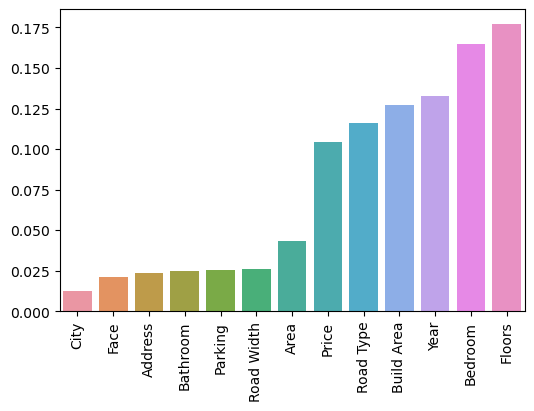

In [62]:
import seaborn as sns
# For plotting
plt.rcParams['figure.dpi'] = 100
column_names = ['Address', 'City', 'Price', 'Bedroom', 'Bathroom', 'Floors', 'Parking',
       'Face', 'Year', 'Area', 'Road Width', 'Road Type', 'Build Area',
       'Amenities']
zipped = zip(feature_importance, column_names)
sorted_pairs = sorted(zipped)

listl = [i for i,j in sorted_pairs]
list2 = [j for i,j in sorted_pairs]

g = sns.barplot(x=list2, y=listl)
txt = g.set_xticklabels(g.get_xticklabels(), rotation = 90)